In [28]:
import numpy as np
import random as rd
import math
import torch.nn as nn
import torch

In [29]:
import matplotlib.pyplot as plt
from tqdm import tqdm as tq

In [30]:
xs = np.empty(0)
for i in range(100):
    v=math.sin(i/4)
    xs=np.append(xs,v)
xs=xs.astype('float32')

In [31]:
def get_sample():
    v=rd.randint(0,80)
    x=xs[v:v+10]
    y=xs[v+10:v+20]
    x=x.reshape((len(x),1,1))
    y=y.reshape((1,len(y)))
    x=torch.from_numpy(x)
    y=torch.from_numpy(y)
    return x,y

In [32]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [33]:
input_size = 1
output_size = 10
n_hidden = 10
rnn = RNN(input_size, n_hidden, output_size)

In [34]:
criterion = nn.MSELoss()
learning_rate = .1

In [35]:
def train(input, real):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(len(input)):
        predicted, hidden = rnn(input[i], hidden)

    loss = criterion(predicted, real)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return predicted, loss.item()

In [36]:
for i in tq(range(500)):
    input, real = get_sample()
    pred,loss = train(input, real)
    if i % 100 == 0:
        print(loss)

 31%|███       | 153/500 [00:00<00:00, 791.72it/s]

0.6865159869194031
0.2387450486421585


 56%|█████▌    | 280/500 [00:00<00:00, 703.60it/s]

0.00017580513667780906
0.02250847965478897


100%|██████████| 500/500 [00:00<00:00, 710.45it/s]

0.03805476054549217


In [37]:
def predict(input):
    hidden = rnn.initHidden()
    with torch.no_grad():
        for i in range(len(input)):
            predicted, hidden = rnn(input[i], hidden)
    return predicted

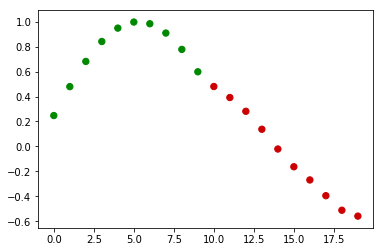

In [38]:
input,real = get_sample()
out = predict(input)
x = input.numpy().ravel()
yr = real.numpy().ravel()
yp = out.numpy().ravel()
ally = np.append(x,yp)
allx = np.arange(20)

c = np.where(allx < 10, "#008800", "#cc0000")
plt.scatter(allx,ally,40,c)
plt.show()